In [10]:
# Boring things first
import datetime

fundamentals = init_fundamentals()

today = datetime.datetime.now().strftime('%Y-%m-%d')
today

'2017-02-01'

In [13]:
# Collect all the data
fundamental_df = get_fundamentals(
        query(
            fundamentals.share_class_reference.is_primary_share,
            fundamentals.valuation.enterprise_value,
            fundamentals.cash_flow_statement.free_cash_flow,
            fundamentals.valuation_ratios.pe_ratio
        )
    
        .filter(fundamentals.cash_flow_statement.free_cash_flow != 0)

        # Filters that someone thought were important.  We'll probably want to filter to only things we can buy
        # via Robinhood.
        #.filter(fundamentals.asset_classification.morningstar_sector_code != 103)
        #.filter(fundamentals.company_reference.country_id == "USA")
        #.filter(fundamentals.asset_classification.morningstar_sector_code != 104)
        #.filter(fundamentals.share_class_reference.is_depositary_receipt == False)
        .filter(fundamentals.share_class_reference.is_primary_share == True),
        #.filter(fundamentals.company_reference.primary_exchange_id != "OTCPK")        
        
        today
    )

# OK, let's check out what we get back.
# When we provide a query and a date, we get back the same type of response
# as in the IDE: a dataframe with securities as columns and each requested
# metric as rows.

transposed = fundamental_df.transpose()


I was curious what pe_ratio looks like compared to the EV/cash computation

4312


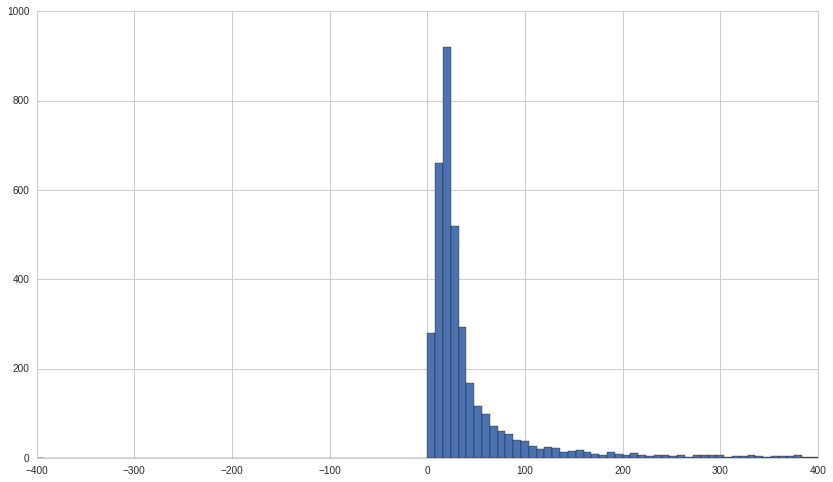

In [14]:
rulevalues = transposed.pe_ratio
print len(rulevalues)
rulevalues.hist(bins=100, range=(-400,400))

4312


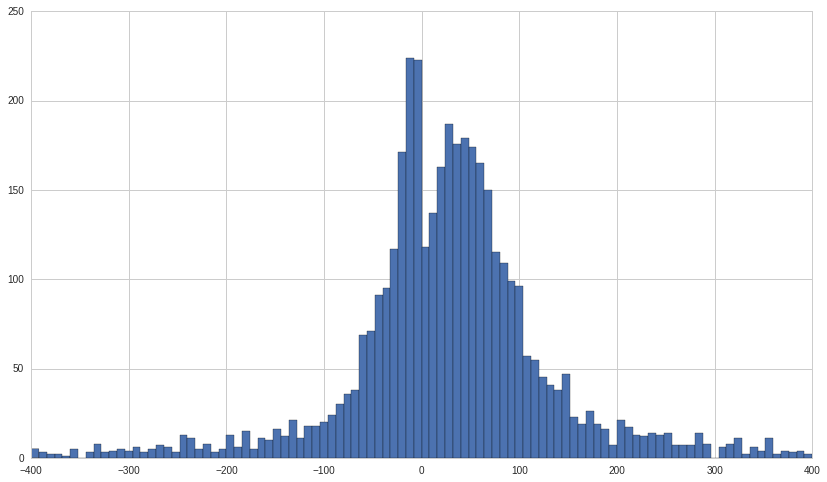

In [15]:
rulevalues = transposed.enterprise_value / transposed.free_cash_flow
print len(rulevalues)
rulevalues.hist(bins=100, range=(-400,400))